这一章作业只有二分类
分为线性可分和线性不可分
案例一：
切分函数是直线，还是假设它是X*theta，设sigmoid为激活函数，x∈R，
If sigmoid(x) ≥  0.5 -》y=1
If sigmoid(x) ＜ 0.5 -》y=0

案例二

根据学生的两门成绩预测学生是否会被大学录取，
数据集：ex2data1.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#读取数据
data = pd.read_csv(r"G:\BaiduNetdiskDownload\ML_NG\02-logistic_regression\ex2data1.txt",names=['Exam 1','Exam 2','Accepted'])
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


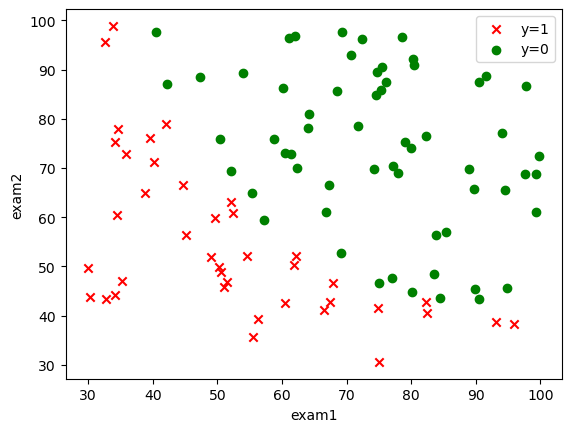

In [16]:
#数据可视化
fig,ax = plt.subplots() #如果只运行这行代码会得到一个空的图
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=1')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='g',marker='o',label='y=0')
#'Accepted']==0是把所有未录取的数据获取出来，['Exam 1']是指x轴是Exam1的值，c='r'表示红色，marker='x'表示图案是叉

ax.legend()#显示标签
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

In [49]:
#构造数据集，就是将它向量化
def get_Xy(data):
    data.insert(0,'ones',1)
    X_=data.iloc[:,0:-1]
    X=X_.values

    y_= data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)

    return X,y

In [50]:
X,y = get_Xy(data)
X.shape

ValueError: cannot insert ones, already exists

In [52]:
y.shape

(100, 1)

In [53]:
#定义激活函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [54]:
#定义损失函数
def costFunction(X,y,theta):
    yhat = sigmoid(X@theta)
    A = y * np.log(yhat)
    B= (1-y)*np.log(1-yhat)
    return -np.sum(A+B)/len(X)

In [55]:
theta = np.zeros((3,1))#因为X是100*3，y是100*1，且x*theta=y,故theta是3*1矩阵
theta.shape

(3, 1)

In [56]:
#先输出初始时的损失
cost_print = costFunction(X,y,theta)
print(cost_print)

0.6931471805599453


In [63]:
#梯度下降

def gradientDescent(X,y,theta,iters,alpha):
    for i in range(iters):
        costs = []
        A = sigmoid(X@theta)
        theta = theta - (alpha/len(X))* X.T @ (A-y)

        cost = costFunction(X,y,theta)
        costs.append(cost)
        if i %1000==0:   #每训练1000次就输出一次损失值
            print(cost)
    return costs,theta

In [65]:
alpha = 0.004
iters = 2000000
costs,theta_final =  gradientDescent(X,y,theta,iters,alpha)

1.9886538578930084
3.078170019864155
5.487009635362496
1.8519433661332634
2.9551289424083595
5.438688730769618
1.804612809072851
2.8312715776074047
5.3886531633606145
1.756153811712155
2.706676380747814
5.3365673644957425
1.7062807047694801
2.5818508519054273
5.281774101800353
1.654412995851205
2.4578430947435757
5.223255119969365
1.5996612097145546
2.3362477519414626
5.159653459570274
1.5408871901849084
2.2190492038468905
5.089387088751128
1.476856785108147
2.10826850905365
5.010845104587983
1.4064493632805843
2.005433890383272
4.9225734611717336
1.3288041261254444
1.9109646054893654
4.823257484826611
1.2432202250971678
1.8235866121521414
4.711246821296763
1.1486277932139577
1.7397667362448002
4.58325740045735
1.0423478306006695
1.652586574603404
4.430932868329269
0.9166267386002209
1.5465331276550867
4.224624720512682
0.7330944584991163
3.9520709655769544
1.115095340214284
3.93912521174624
0.4181482209600352
3.7379122586603324
0.28403008381623446
0.8040201118506516
0.2683963264620448

In [ ]:
#最后的损失值是接近0.20左右

In [66]:
theta_final

array([[-25.02582417],
       [  0.20514779],
       [  0.20037514]])

In [69]:
#预测
def predict(X,theta):
    prob = sigmoid(X@theta)
    return [1 if x >=0.5 else 0 for x in prob]

这句代码是一个列表推导式，用于将一个概率数组 prob 中的每个元素转换为二进制值（0 或 1）。具体来说，如果某个元素 x 大于或等于 0.5，则将其转换为 1；否则，转换为 0。

In [70]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc = np.mean(y_pre ==y)
print(acc)

0.89


In [71]:
"""
这段代码的主要目的是计算模型预测的准确性（accuracy）。具体步骤如下：
使用 predict 函数根据输入特征 X 和最终参数 theta_final 进行预测，得到预测值 y_。
将预测值 y_ 转换为列向量形式 y_pre。
计算预测值 y_pre 与真实标签 y 之间的准确率 acc。
打印出准确率 acc。
"""

'\n这段代码的主要目的是计算模型预测的准确性（accuracy）。具体步骤如下：\n使用 predict 函数根据输入特征 X 和最终参数 theta_final 进行预测，得到预测值 y_。\n将预测值 y_ 转换为列向量形式 y_pre。\n计算预测值 y_pre 与真实标签 y 之间的准确率 acc。\n打印出准确率 acc。\n'

In [77]:
#决策边界
coef1 = - theta_final[0,0] / theta_final[2,0]
coef2 = - theta_final[1,0] / theta_final[2,0]

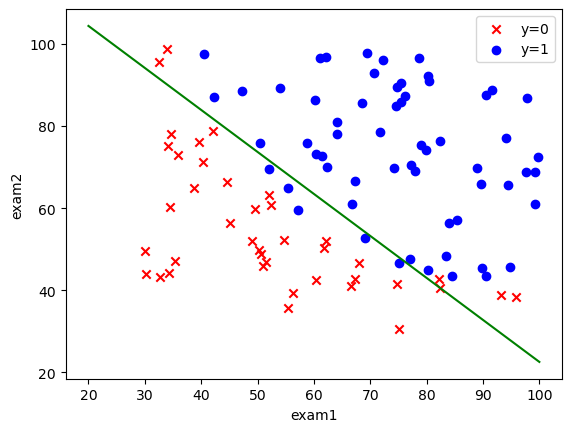

In [81]:
x = np.linspace(20,100,100) #从20-100之间均匀生成100个点，带入函数中就可画出图形
f = coef1 + coef2 * x

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',
          ylabel='exam2')

ax.plot(x,f,c='g')#画出直线（决策边界）
plt.show()#画出数据分布